In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report,precision_score, confusion_matrix, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("BigBasket Products.csv")

In [3]:
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [5]:
df.drop("index", axis=1, inplace=True)

In [6]:
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

It is clear that rating and decription have a sizeable amount of null values, which can be taken care of with filling them with 0 or "None"

In [7]:
df["rating"] = df["rating"].fillna(0)
df["description"] = df["description"].fillna("None")


In [8]:
df.isnull().sum()

product         1
category        0
sub_category    0
brand           1
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [9]:
df = df.dropna()

## Visual Findings

### Pie Chart of Subcategories sold

In [10]:
subcat_group = df.groupby(by="sub_category")
subcat_group["sale_price", "market_price"].sum()

,sale_price,market_price
sub_category,,
All Purpose Cleaners,129005.54,139444.0
Appliances & Electricals,35393.45,57738.0
"Atta, Flours & Sooji",22773.64,27735.0
Baby Accessories,15157.00,15157.0
Baby Bath & Hygiene,86332.27,89291.0
...,...,...
Steel Utensils,146984.00,243493.0
Storage & Accessories,308042.00,438212.0
Tea,90127.52,109495.0


In [11]:
cat_group = df.groupby(by="category")
cat_group["sale_price", "market_price"].sum()

,sale_price,market_price
category,,
Baby Care,326317.17,364020.00
"Bakery, Cakes & Dairy",121525.14,134357.00
Beauty & Hygiene,3293749.24,3882642.22
Beverages,211986.67,240687.00
Cleaning & Household,604963.09,701100.35
"Eggs, Meat & Fish",101114.12,114042.42
"Foodgrains, Oil & Masala",516916.23,615833.00
Fruits & Vegetables,28345.36,35889.55
Gourmet & World Food,1500115.31,1680993.95


In [13]:
group_cat_subcat = df.groupby(by=["category", "sub_category"])
multi_level_group_sum = group_cat_subcat["sale_price", "market_price"].sum()

In [17]:
multi_level_group_sum

sale_price  market_price
category               sub_category                                       
Baby Care              Atta, Flours & Sooji           300.00         300.0
                       Baby Accessories             15157.00       15157.0
                       Baby Bath & Hygiene          86332.27       89291.0
                       Baby Food & Formula          16974.15       17049.0
                       Diapers & Wipes             183251.76      217756.0
...                                                      ...           ...
Snacks & Branded Foods Noodle, Pasta, Vermicelli     8762.36        9453.0
                       Pickles & Chutney            20245.11       20862.0
                       Ready To Cook & Eat          58615.50       64175.0
                       Snacks & Namkeen             33674.89       35915.5
                       Spreads, Sauces, Ketchup     67417.69       71972.0

[99 rows x 2 columns]

In [18]:
index_list = []
for (index, sub_index) in multi_level_group_sum.index:
    if index not in index_list:
        index_list.append(index)

index_list

['Baby Care',
 'Bakery, Cakes & Dairy',
 'Beauty & Hygiene',
 'Beverages',
 'Cleaning & Household',
 'Eggs, Meat & Fish',
 'Foodgrains, Oil & Masala',
 'Fruits & Vegetables',
 'Gourmet & World Food',
 'Kitchen, Garden & Pets',
 'Snacks & Branded Foods']

In [19]:
def pie_charts_multi(multi_group, index=None, multilevel=None):
    plt.figure(figsize=(8, 6))
    for (ind, subindex) in multi_group.index:
        for column in multi_group.columns:
            explode= np.linspace(0, 0.1, len(multi_group[column][index].index))
            if ind==index and column == "sale_price":
                explode= np.linspace(0, 0.1, len(multi_group[column][ind].index))
                plt.pie(x=multi_group[column][ind], 
                        labels=multi_group[column][ind].index,
                        autopct="%1.1f%%",
                        explode=explode,
                        shadow=True,
                        wedgeprops={"edgecolor":"red"})
                plt.title(index)
                

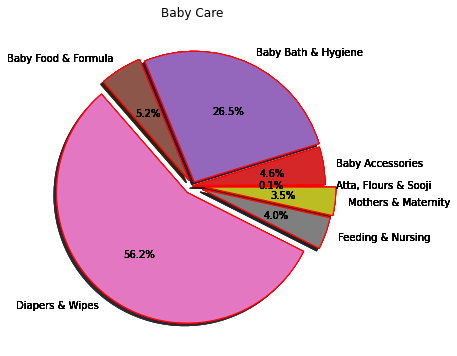

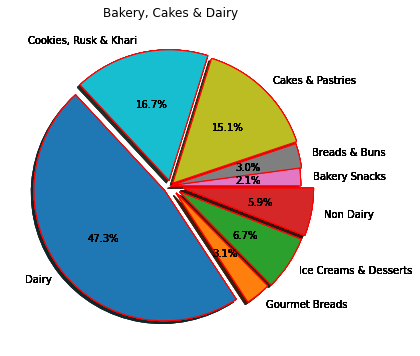

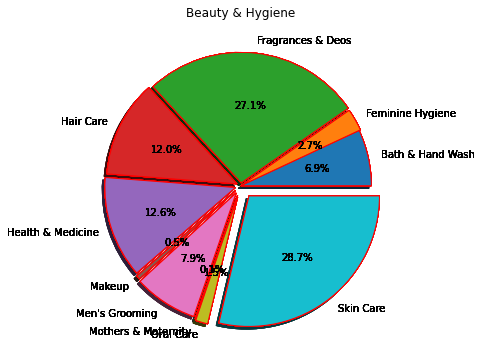

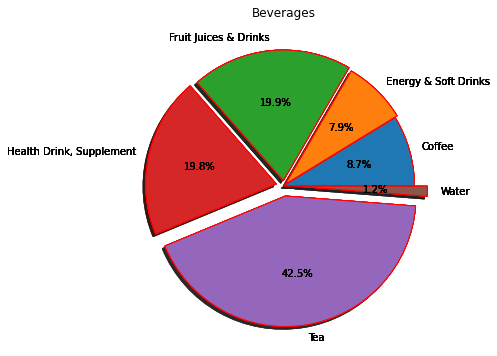

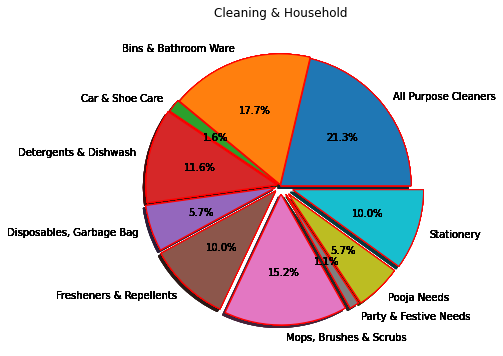

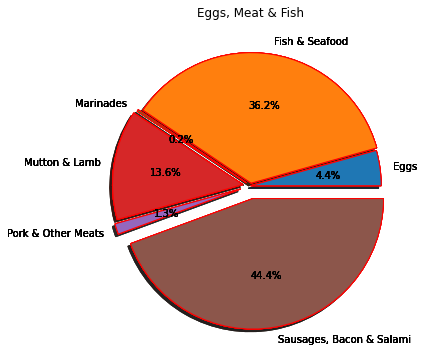

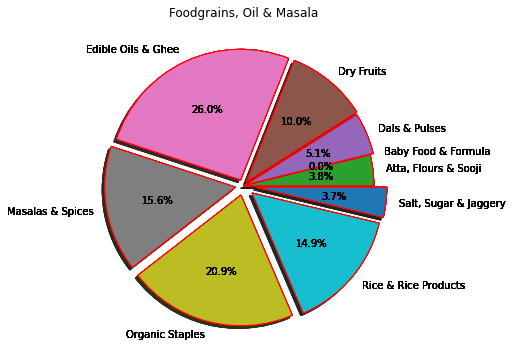

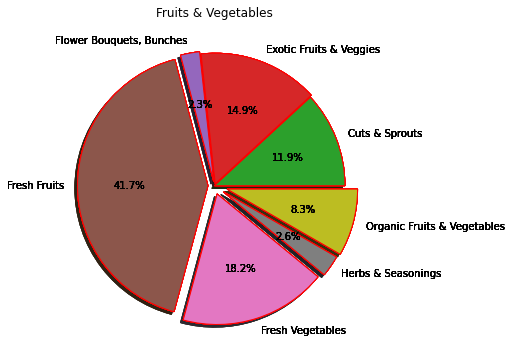

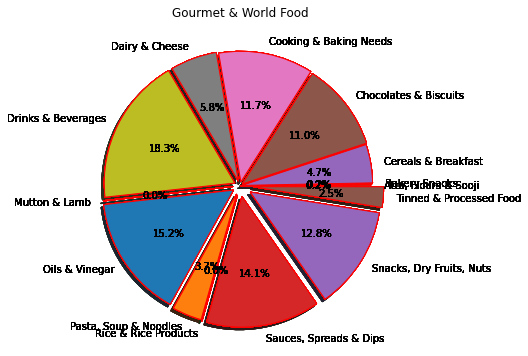

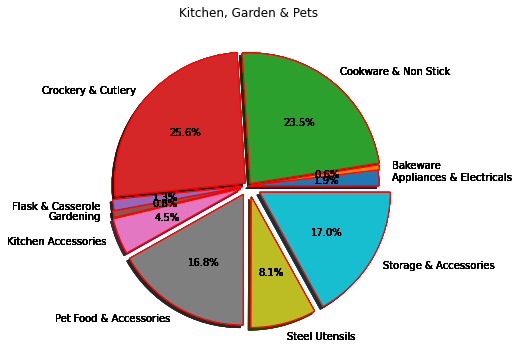

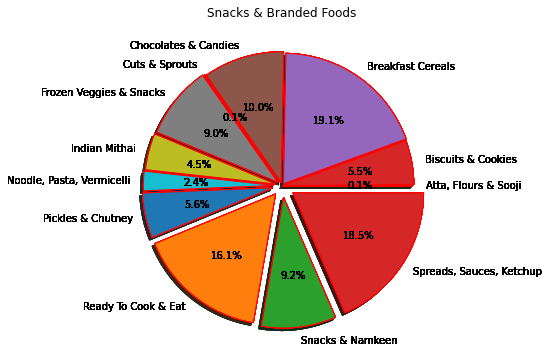

In [20]:
for i in range(len(index_list)):
    pie_charts_multi(multi_level_group_sum, index=index_list[i], multilevel=True)

In [21]:

# plt.figure(figsize=(8, 6))
# for (index, subindex) in multi_level_group_sum.index:
#     for column in multi_level_group_sum.columns:
#             explode= np.linspace(0, 0.1, len(multi_level_group_sum[column][index].index))
#             if index=="Baby Care":
#                 explode= np.linspace(0, 0.1, len(multi_level_group_sum[column][index].index))
#                 plt.pie(x=multi_level_group_sum["sale_price"][index], 
#                     labels=multi_level_group_sum["sale_price"][index].index,
#                    autopct="%1.1f%%",
#                    explode=explode,
#                     shadow=True,
#                     wedgeprops={"edgecolor":"red"})
#                 plt.title(index)
            

In [22]:
# multi_level_group_sum["sale_price"]["Baby Care"].index

In [23]:
df

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...
27550,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [24]:
brand_count_df = pd.DataFrame(df["brand"].value_counts())

In [25]:
popular_brands = brand_count_df[brand_count_df["brand"] > 150]

In [26]:
pb_list = list(popular_brands.index)

In [27]:
pb_list

['Fresho', 'bb Royal', 'BB Home', 'DP', 'Fresho Signature', 'bb Combo', 'Amul']

### Sale Price vs Popular Brands

In [29]:
df["Popular Brand"] = df["brand"].map(lambda x: 1 if x in pb_list else 0)

In [31]:
df["Discount"] = df["market_price"] - df["sale_price"]

In [33]:
popular_brands_df = df.loc[df["Popular Brand"] == 1]

In [36]:
pb_group = popular_brands_df.groupby(by=["brand", "category"])
pb_group_median = pb_group.median()

In [37]:
pb_group_median

sale_price  market_price  rating  \
brand            category                                                     
Amul             Baby Care                    380.000         380.0    4.50   
                 Bakery, Cakes & Dairy         93.060         100.0    4.00   
                 Foodgrains, Oil & Masala     486.000         500.0    4.20   
                 Snacks & Branded Foods       112.500         125.0    4.25   
BB Home          Beauty & Hygiene             135.000         189.0    2.50   
                 Cleaning & Household         110.000         130.0    4.00   
                 Kitchen, Garden & Pets       229.000         399.0    0.00   
DP               Beauty & Hygiene             118.455         182.5    1.60   
                 Cleaning & Household         240.500         329.5    0.00   
                 Kitchen, Garden & Pets       234.500         403.5    0.00   
Fresho           Bakery, Cakes & Dairy         39.000          39.0    0.00   
                 Eggs, Meat & Fish            237.900         305.0    0.00   
                 Foodgrains, Oil & Masala    1092.000        1350.0    4.10   
                 Fruits & Vegetables           32.000          40.0    0.00   
                 Snacks & Branded Foods       198.000         270.0    4.00   
Fresho Signature Bakery, Cakes & Dairy        119.000         149.0    0.00   
                 Eggs, Meat & Fish            295.200         328.0    0.00   
                 Gourmet & World Food         362.700         470.0    0.00   
bb Combo         Baby Care                   1778.000        1778.0    0.00   
                 Bakery, Cakes & Dairy        324.000         339.0    0.00   
                 Beauty & Hygiene             249.000         268.0    0.00   
                 Beverages                    155.000         155.0    0.00   
                 Cleaning & Household         343.000         385.0    0.00   
                 Eggs, Meat & Fish            456.000         579.0    0.00   
                 Foodgrains, Oil & Masala     447.000         700.0    0.00   
                 Fruits & Vegetables          114.000         142.5    0.00   
                 Gourmet & World Food         672.000         963.0    0.00   
                 Kitchen, Garden & Pets      1490.500        1670.0    0.00   
                 Snacks & Branded Foods       482.000         530.0    0.00   
bb Royal         Foodgrains, Oil & Masala     117.000         165.0    3.70   
                 Gourmet & World Food         955.000        1750.0    0.00   
                 Snacks & Branded Foods       337.640         575.0    4.00   

                                           Popular Brand  Discount  
brand            category                                           
Amul             Baby Care                           1.0      0.00  
                 Bakery, Cakes & Dairy               1.0      0.00  
                 Foodgrains, Oil & Masala            1.0      0.00  
                 Snacks & Branded Foods              1.0     10.00  
BB Home          Beauty & Hygiene                    1.0     50.00  
                 Cleaning & Household                1.0     28.00  
                 Kitchen, Garden & Pets              1.0    130.00  
DP               Beauty & Hygiene                    1.0     66.00  
                 Cleaning & Household                1.0     75.00  
                 Kitchen, Garden & Pets              1.0    150.00  
Fresho           Bakery, Cakes & Dairy               1.0      0.00  
                 Eggs, Meat & Fish                   1.0     64.00  
                 Foodgrains, Oil & Masala            1.0    258.00  
                 Fruits & Vegetables                 1.0      8.45  
                 Snacks & Branded Foods              1.0     72.00  
Fresho Signature Bakery, Cakes & Dairy               1.0      0.00  
                 Eggs, Meat & Fish                   1.0     32.80  
                 Gourmet & World Food        